Notes
numpy frame 10,11,12,53 removed
illumination correction was done by applying filter from image 2 to all images





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import tifffile
import seaborn as sns2
from IPython.display import HTML
import matplotlib.animation as animation
from tqdm.notebook import tqdm, trange
from preprocessing import preprocessing_v2 as pp
from utils import analysis_utils as au
import importlib
plt.rcParams['font.size'] = '20'
from utils import graph_utils as gu
import shutil
from sklearn.linear_model import LinearRegression
from scipy.spatial.transform import Rotation as R
import scipy.ndimage
from utils import analysis_utils as au

## PATHS and CONSTANTS



In [2]:
PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
#DATA_PATH = r'D:\amityu\backoffice_data\\'
movie = '160624_2'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/", movie + "/")
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [3]:
execute = True
if execute:
    pp.save_exp_data(MOVIE_PATH, "Am200 ca120", 0.175,0.175, 0.250, spike_in=14, spike_out=24)


In [7]:
copy_flag  = True
if copy_flag:
    source_dir = os.path.join(MOVIE_PATH, '1-tiff')
    files = os.listdir(source_dir)
    for file in tqdm(files):
        if file.endswith('C1.tif'):
            shutil.copyfile(os.path.join(source_dir,file), os.path.join(MOVIE_PATH, 'tiff/C1/', file))
        elif file.endswith('C2.tif'):
            shutil.copyfile(os.path.join(source_dir,file), os.path.join(MOVIE_PATH, 'tiff/C2/', file))

  0%|          | 0/108 [00:00<?, ?it/s]

## <span color=red >Load Images

</span>


In [45]:
file_list = pp.get_file_list(MOVIE_PATH + 'tiff/C1/')

1 Capture 7_T1_C1.tif
2 Capture 7_T2_C1.tif
3 Capture 7_T3_C1.tif
4 Capture 7_T4_C1.tif
5 Capture 7_T5_C1.tif
6 Capture 7_T6_C1.tif
7 Capture 7_T7_C1.tif
8 Capture 7_T8_C1.tif
9 Capture 7_T9_C1.tif
10 Capture 7_T10_C1.tif
11 Capture 7_T11_C1.tif
12 Capture 7_T12_C1.tif
13 Capture 7_T13_C1.tif
14 Capture 7_T14_C1.tif
15 Capture 7_T15_C1.tif
16 Capture 7_T16_C1.tif
17 Capture 7_T17_C1.tif
18 Capture 7_T18_C1.tif
19 Capture 7_T19_C1.tif
20 Capture 7_T20_C1.tif
21 Capture 7_T21_C1.tif
22 Capture 7_T22_C1.tif
23 Capture 7_T23_C1.tif
24 Capture 7_T24_C1.tif
25 Capture 7_T25_C1.tif
26 Capture 7_T26_C1.tif
27 Capture 7_T27_C1.tif
28 Capture 7_T28_C1.tif
29 Capture 7_T29_C1.tif
30 Capture 7_T30_C1.tif
31 Capture 7_T31_C1.tif
32 Capture 7_T32_C1.tif
33 Capture 7_T33_C1.tif
34 Capture 7_T34_C1.tif
35 Capture 7_T35_C1.tif
36 Capture 7_T36_C1.tif
37 Capture 7_T37_C1.tif
38 Capture 7_T38_C1.tif
39 Capture 7_T39_C1.tif
40 Capture 7_T40_C1.tif
41 Capture 7_T41_C1.tif
42 Capture 7_T42_C1.tif
43 Capture

In [46]:
#load images
gel_list = []
for i in range(len(file_list)):
    gel_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C1/' + file_list[i]))
    print(i, end = ',')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,

In [47]:
# get the max z since images where taken with different
max_z = pp.get_max_z(gel_list)


0 : (113, 512, 512)
1 : (113, 512, 512)
2 : (113, 512, 512)
3 : (113, 512, 512)
4 : (113, 512, 512)
5 : (113, 512, 512)
6 : (113, 512, 512)
7 : (113, 512, 512)
8 : (113, 512, 512)
9 : (113, 512, 512)
10 : (113, 512, 512)
11 : (113, 512, 512)
12 : (113, 512, 512)
13 : (113, 512, 512)
14 : (113, 512, 512)
15 : (113, 512, 512)
16 : (113, 512, 512)
17 : (113, 512, 512)
18 : (113, 512, 512)
19 : (113, 512, 512)
20 : (113, 512, 512)
21 : (113, 512, 512)
22 : (113, 512, 512)
23 : (113, 512, 512)
24 : (113, 512, 512)
25 : (113, 512, 512)
26 : (113, 512, 512)
27 : (113, 512, 512)
28 : (113, 512, 512)
29 : (113, 512, 512)
30 : (113, 512, 512)
31 : (113, 512, 512)
32 : (113, 512, 512)
33 : (113, 512, 512)
34 : (113, 512, 512)
35 : (113, 512, 512)
36 : (113, 512, 512)
37 : (113, 512, 512)
38 : (113, 512, 512)
39 : (113, 512, 512)
40 : (113, 512, 512)
41 : (113, 512, 512)
42 : (113, 512, 512)
43 : (113, 512, 512)
44 : (113, 512, 512)
45 : (113, 512, 512)
46 : (113, 512, 512)
47 : (113, 512, 512)
48

In [48]:
#set blank areas to nan

gel = pp.make_numpy_from_list(gel_list, max_z)

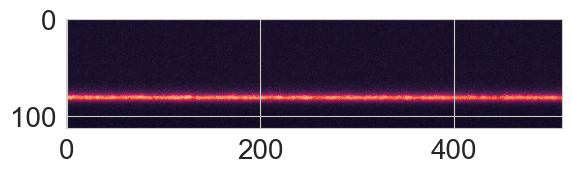

In [49]:
plt.imshow(gel[10,:,:,256])
plt.show()

In [50]:
gel = np.flip(gel, axis=1)

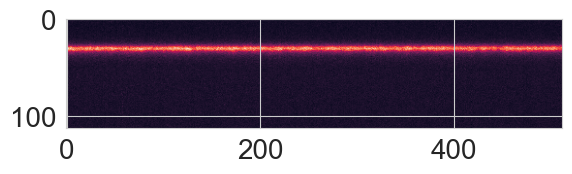

In [51]:
plt.imshow(gel[10, :, :, 256])
plt.show()

In [84]:
mask = np.ones(len(gel), dtype=bool)

mask[[10,11,12,53]] =  False


In [53]:
gel = gel[mask]

In [54]:
np.save(MOVIE_PATH + 'tmp/gel.npy',gel)


In [17]:
del gel

In [3]:
gel = np.load(MOVIE_PATH + 'tmp/gel.npy')#, mmap_mode='r')

In [155]:
gel.shape

(50, 113, 512, 512)

In [156]:
raw_data =gel[~np.isnan(gel)]  #

In [157]:
hist, bin_edges = au.histogram_cupy(raw_data, bins=np.linspace(0,350,50))

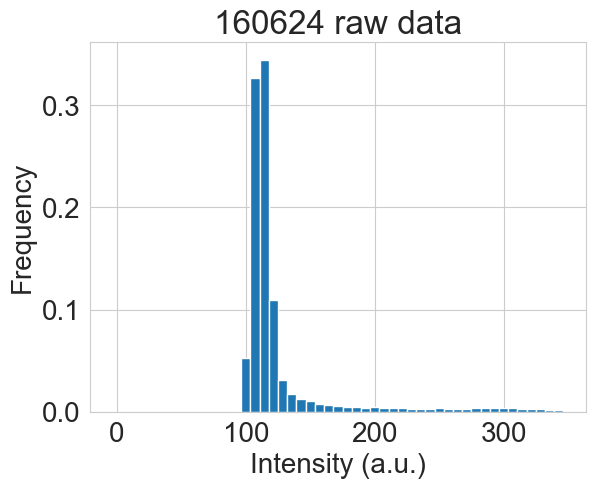

In [158]:
plt.bar(bin_edges[:-1],hist, width =bin_edges[1]- bin_edges[0])
plt.title('160624 raw data')
image_name = 'raw_data'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')
plt.show()

## <span color=red> Illumination filter

In [4]:
illumination_sigma = 25

In [36]:

min_z_filter = 0
max_z_filter = 4

In [6]:
filters = []
time_points = range(0,len(gel),1)
for i,t in tqdm(enumerate(time_points)):
   
    filters.append(pp.get_illumination_filter(gel[t],min_z_filter,max_z_filter,illumination_sigma))

0it [00:00, ?it/s]

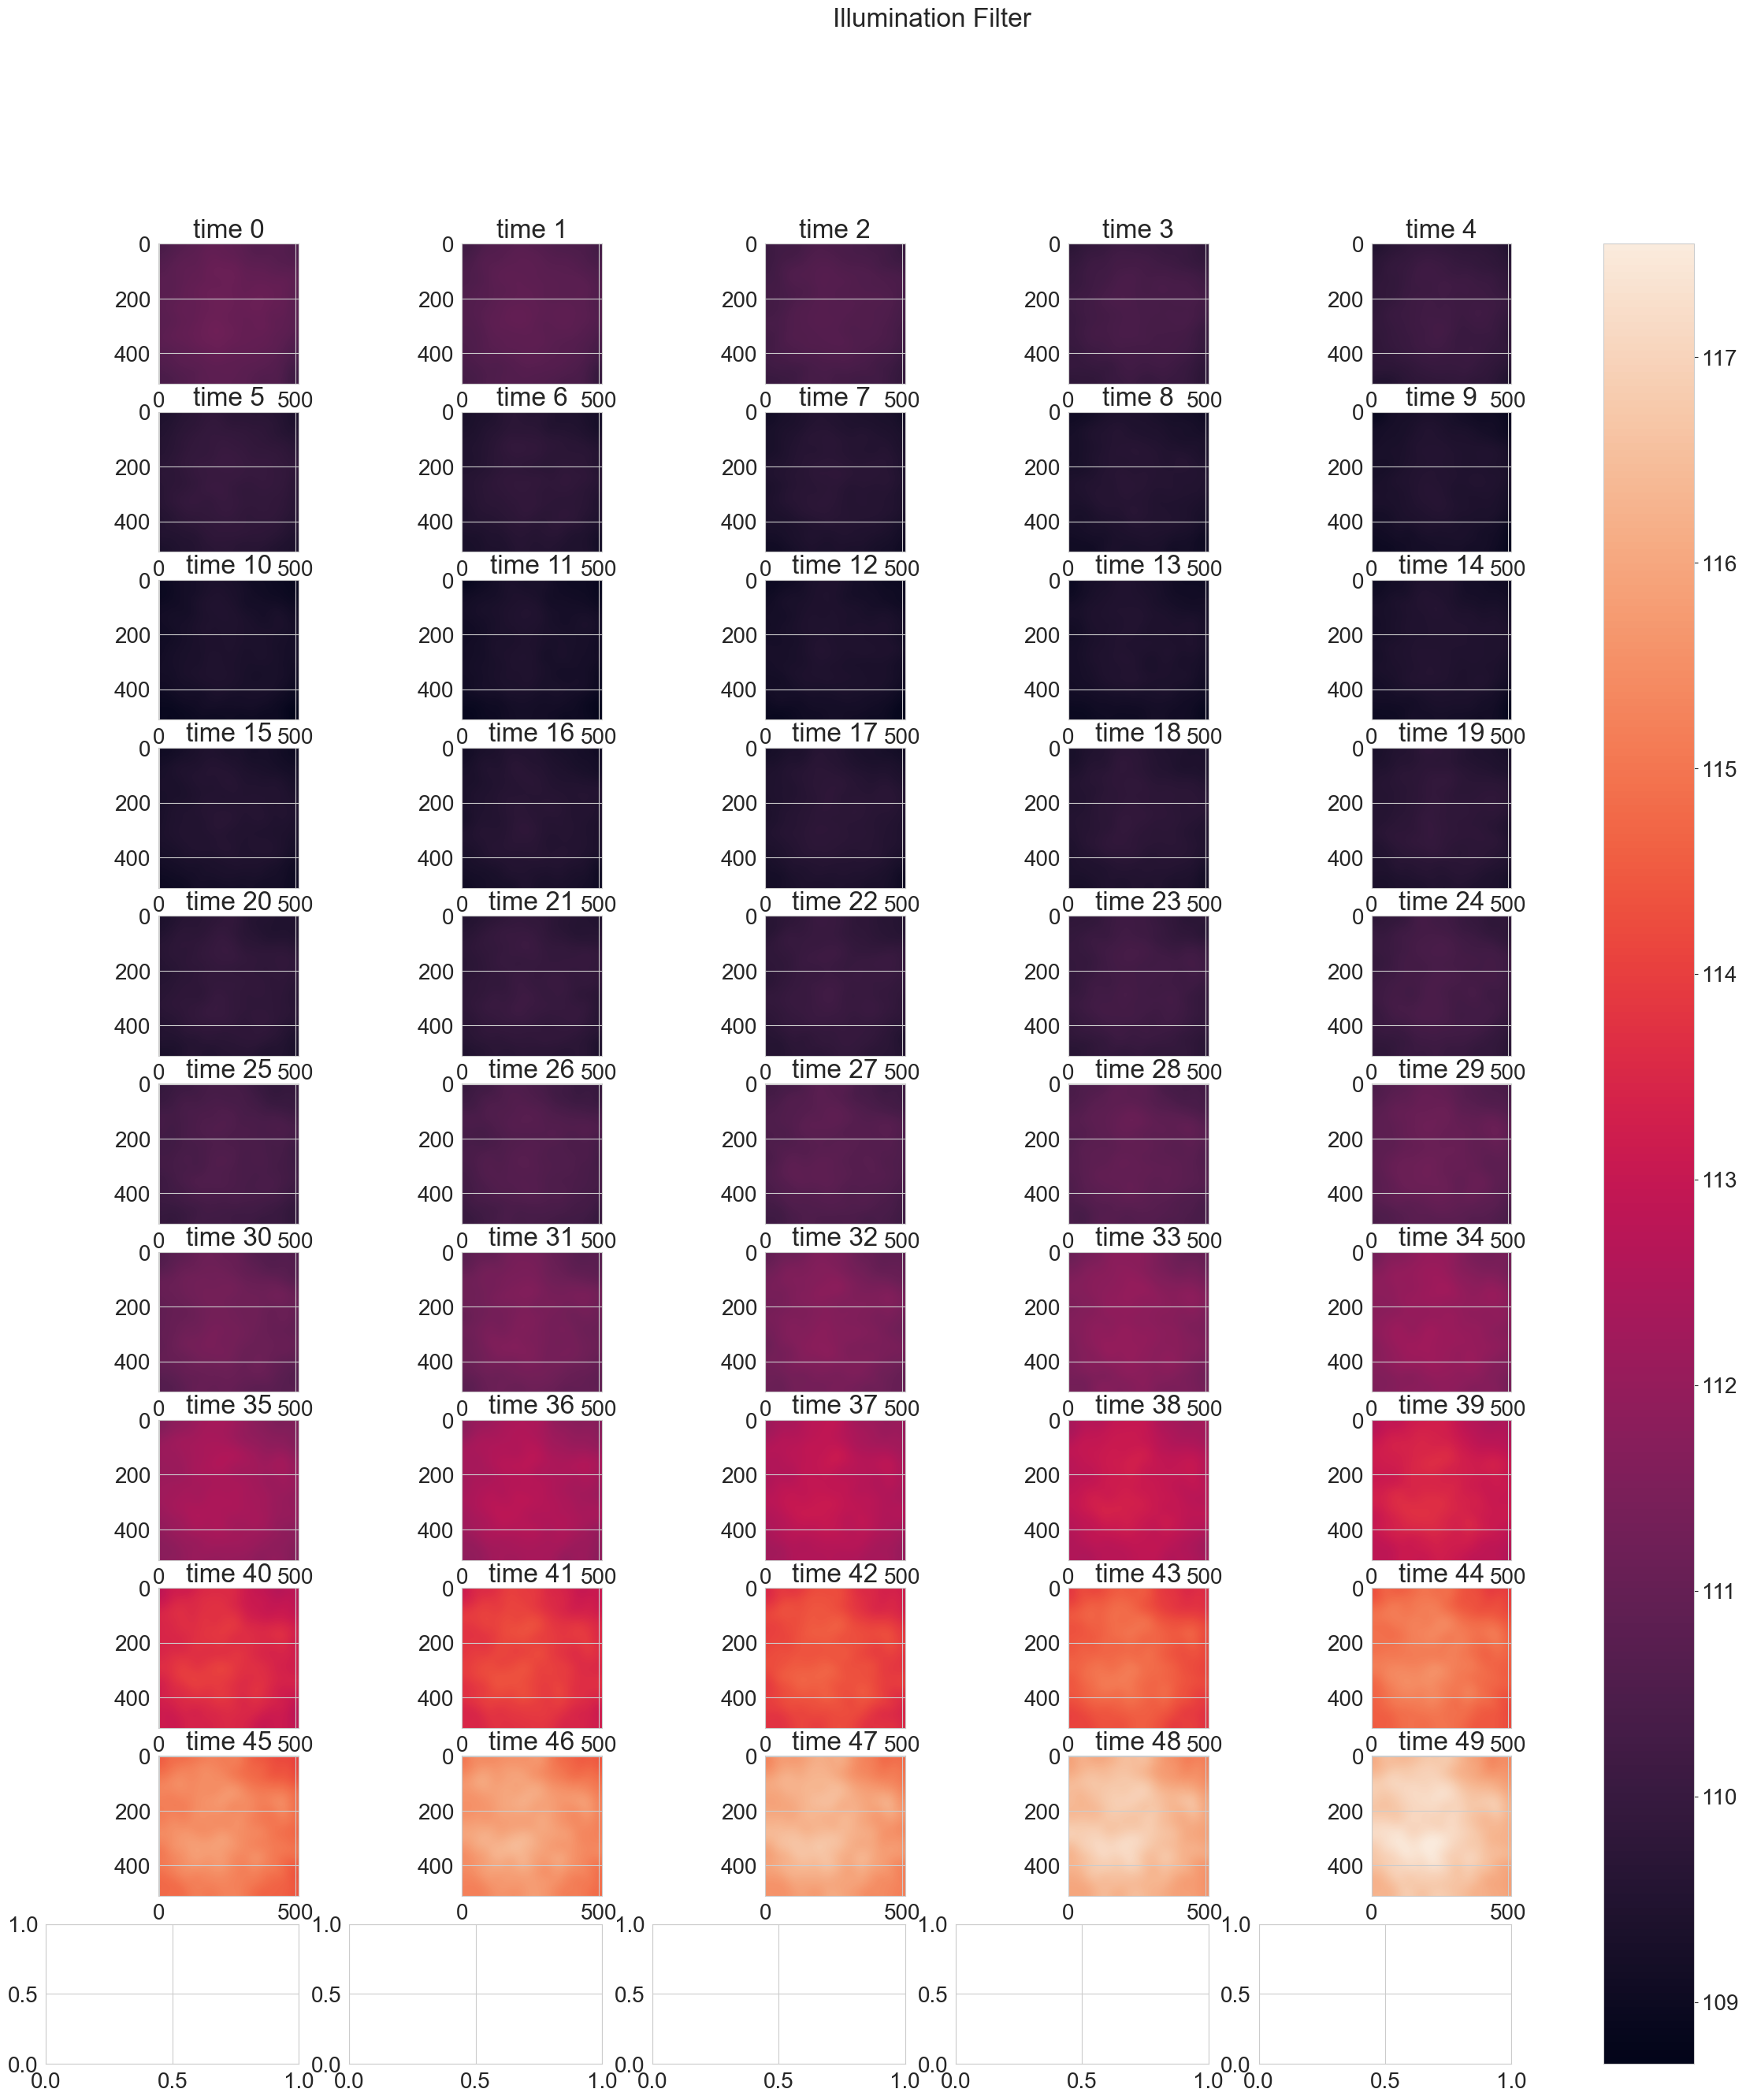

In [162]:
gu.show_imshow_sequence_with_colorbar(filters,time_points, 'Illumination Filter')



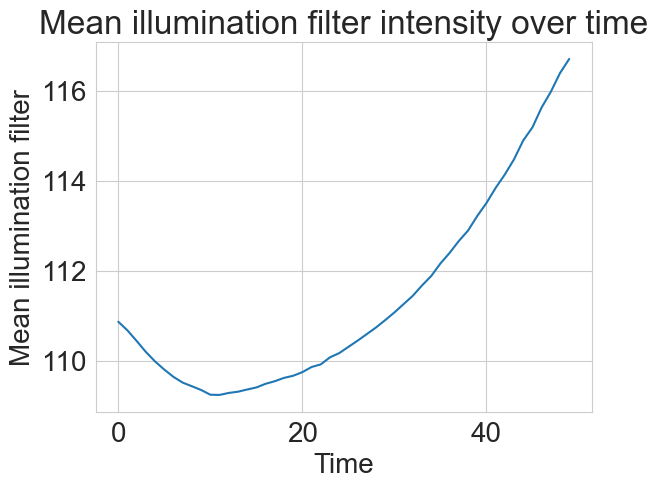

In [163]:
mean_illumination = np.mean(filters, axis = (1,2))
plt.plot(mean_illumination)
plt.title('Mean illumination filter intensity over time')
plt.xlabel('Time')
plt.ylabel('Mean illumination filter')
plt.show()


In [168]:
importlib.reload(pp)

<module 'preprocessing.preprocessing_v2' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\preprocessing\\preprocessing_v2.py'>

In [7]:
gel_corrected = pp.apply_one_illumination_filter(gel, filters[2])

  0%|          | 0/50 [00:00<?, ?it/s]

In [8]:
del gel

In [ ]:
del gel_list    

In [9]:
data_after_illumination = gel_corrected[~np.isnan(gel_corrected)] 

In [10]:

hist, bins_edges = au.histogram_cupy(data_after_illumination, bins = np.linspace(0.8, 1.8, 51) )

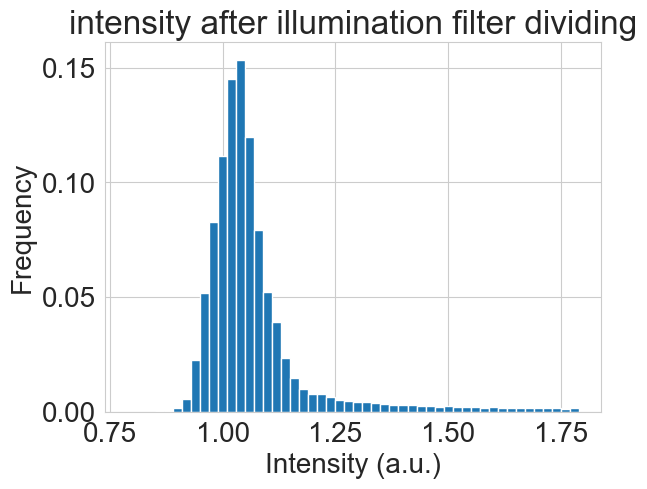

In [11]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1]- bins_edges[0])
plt.title('intensity after illumination filter dividing')
image_name = 'after_illumination_filter'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

plt.show()

In [13]:
np.save(MOVIE_PATH + 'tmp/gel_corrected.npy', gel_corrected)

In [3]:
gel_corrected = np.load(MOVIE_PATH + 'tmp/gel_corrected.npy')

In [177]:
del gel_minus_monomer

In [110]:
del data_after_illumination

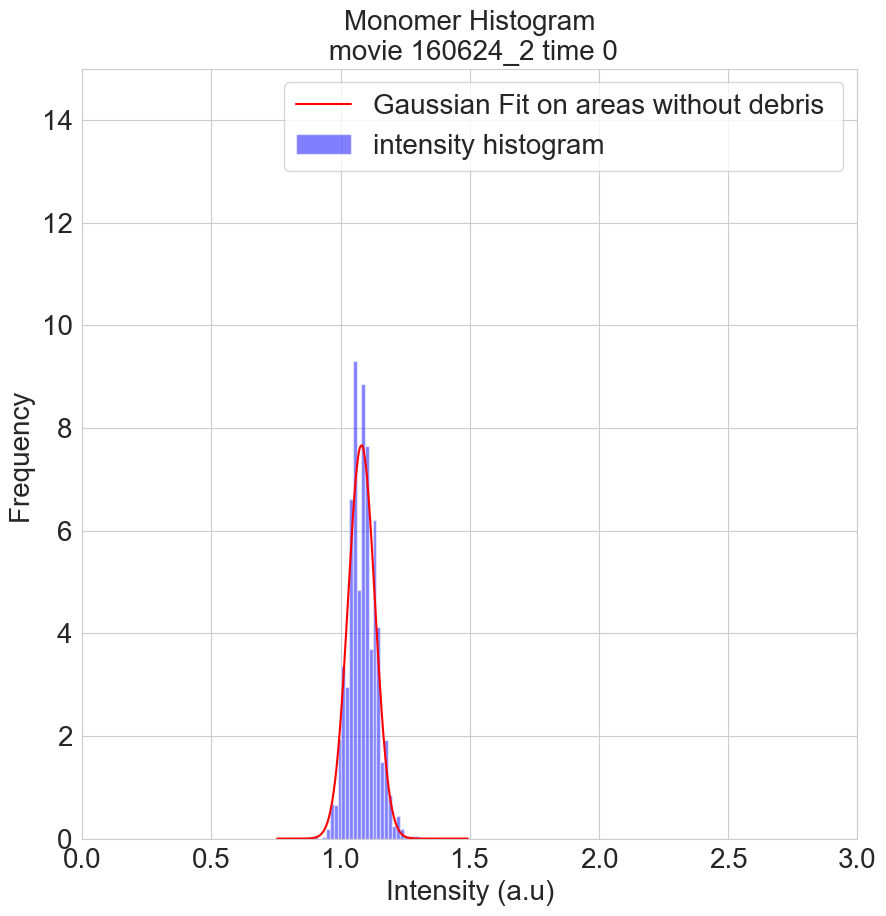

In [111]:
# save animation of fitting the curve
monomer_data_df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv')

pp.monomer_fit_animation(movie,gel_corrected, monomer_data_df, GRAPH_PATH + 'tmp')

In [112]:
monomer_data_df = pd.read_csv(MOVIE_PATH + 'np/monomer_rect.csv')
monomer_data_df = pp.fit_monomer(gel_corrected, monomer_data_df)
monomer_data_df.to_csv(MOVIE_PATH + 'np/monomer_rectv2.csv')


  0%|          | 0/50 [00:00<?, ?it/s]

### add monomer to add path as monomer_rect.csv

In [4]:
gel_minus_monomer = gel_corrected.copy()
gel_minus_monomer[gel_minus_monomer==0]=np.nan
monomer = pd.read_csv(ADD_PATH + 'monomer_rect.csv')
mean_monomer = monomer['gaussian_mean'].to_numpy()
for t in trange(len(gel_minus_monomer)):
    gel_minus_monomer[t] -= mean_monomer[t]


  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
data = gel_minus_monomer[~np.isnan(gel_minus_monomer)]

In [6]:

hist, bins_edges = au.histogram_cupy(data, bins=np.linspace(-0.2, 2, 51))

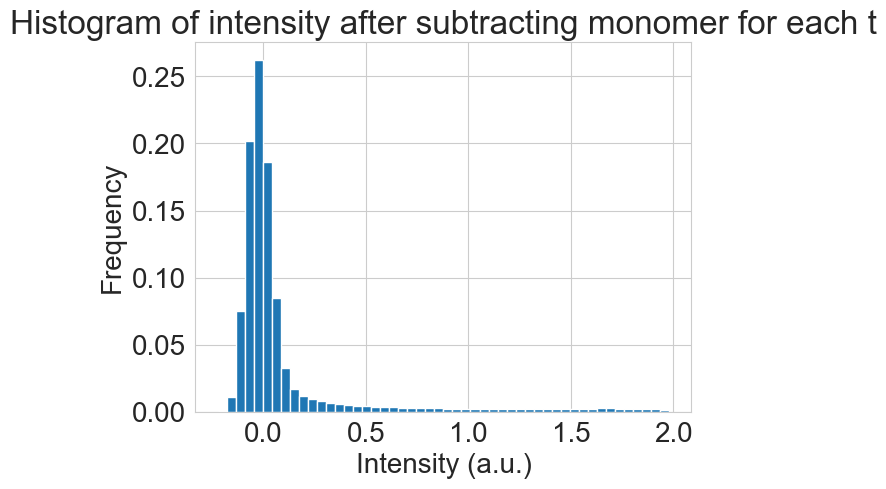

In [7]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1] - bins_edges[0])
plt.title('Histogram of intensity after subtracting monomer for each t')
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

image_name = 'gel_div_filter_mono_reduced'
plt.show()

<span color = yellow> Background bellow membrane measuring


Text(0, 0.5, 'Intensity')

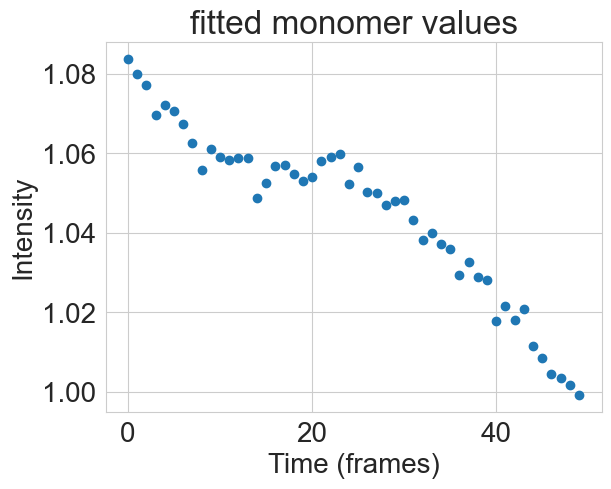

In [8]:
plt.rcParams.update({'font.size' :20})
plt.scatter(range(len(mean_monomer)),mean_monomer)
plt.title('fitted monomer values')
plt.xlabel('Time (frames)')
plt.ylabel('Intensity')


In [9]:
np.save(MOVIE_PATH + 'tmp/gel_norm_before_stabilize.npy', gel_minus_monomer)


In [10]:
monomer_data_df = pd.read_csv(ADD_PATH + 'monomer_rect.csv')

In [11]:
gel = np.load(MOVIE_PATH + 'tmp/gel_norm_before_stabilize.npy', mmap_mode='r')
#gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r')


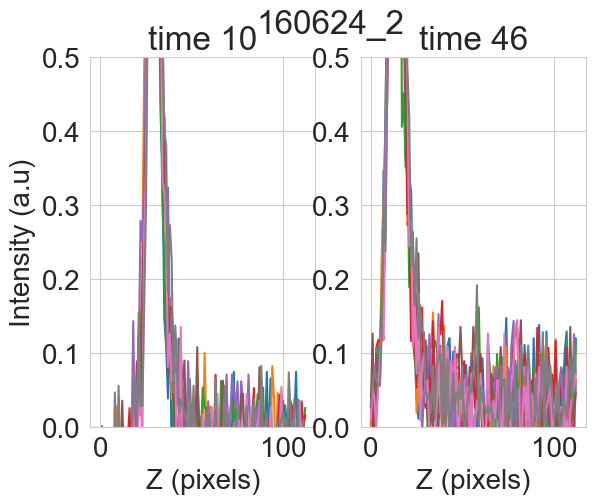

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)
t1 = 10
t2 = 46

y = 256
for x in range(0,gel.shape[3],70):
    ax1.plot(gel[t1,:,y,x])
    ax2.plot(gel[t2,:,y,x])
ax1.set_ylim(0,0.5)
ax2.set_ylim(0,0.5)
ax1.set_title('time {}'.format(t1))
ax2.set_title('time {}'.format(t2))
ax1.set_xlabel('Z (pixels)')
ax2.set_xlabel('Z (pixels)')

ax1.set_ylabel('Intensity (a.u)')
fig.suptitle(movie)

plt.show()

### <span color='red'> pay attention if monomer mean is reduced, you have to pass to get_surface number_of_mean = 0

In [13]:
# gel is very long and z axis relatively small. therefore I open memory map file that will add zeros above the gel. this will make 
#background area and make it the largest component when creating the mask in segmentation 
# Create a new memory-mapped array with the adjusted shape
data_shape = (gel.shape[0] , gel.shape[1]+40) + gel.shape[2:]
new_gel = np.memmap(MOVIE_PATH + 'tmp/new_data.mmap', dtype='float32', mode='w+', shape=data_shape)

# Copy data into the right positions
new_gel[:,: gel.shape[1], ...] = gel

# Flush changes to disk and close the files
new_gel.flush()

### <span color = 'yellow'> Important note, membrane and surface should also be transoformed

In [14]:

from preprocessing import preprocessing_v2 as pp
for std in [4.5]:
    surface, membrane = pp.get_surface_and_membrane(new_gel, ADD_PATH, number_of_mean=0, number_of_std= std, selem_radius=3)
    surface[surface>=gel.shape[1]]= gel.shape[1]-1
    np.save(MOVIE_PATH + 'tmp/height%d_s3.npy'%(std*10), surface)
    np.save(MOVIE_PATH + 'tmp/membrane%d_s3.npy'%(std*10),membrane)
    

  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
del new_gel

## <span color='yellow'> check segemntation in gui

In [56]:

membrane = np.load(MOVIE_PATH + 'tmp/membrane45_s3.npy')

In [28]:
#del stabilized_gel

In [57]:
#saving z values of the membrane height for later use while shifting channel2 and surface and height
z = np.nanmean(membrane, axis = (1,2))
df =  pd.DataFrame({'z' : z})
first = True
if first:
    df.to_csv(MOVIE_PATH + 'np/membrane_fit.csv')

In [18]:
z0 = 15

In [19]:
gel_minus_monomer = np.load(MOVIE_PATH + 'tmp/gel_norm_before_stabilize.npy', mmap_mode='r')

gel_norm_b = np.zeros(gel_minus_monomer.shape, dtype = np.float32)
#z = pd.read_csv(MOVIE_PATH + 'np/membrane_fit.csv')['z'].to_numpy()
for t in trange(len(gel_minus_monomer)):
    shift_val = [(z0-z[t]),0,0]

    # shift your array
    gel_norm_b[t] = scipy.ndimage.shift(gel_minus_monomer[t], shift_val, mode='constant', cval=np.nan, order=1)


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\Temp\ipykernel_15272\3757411258.py:1: RuntimeWarning:

All-NaN slice encountered



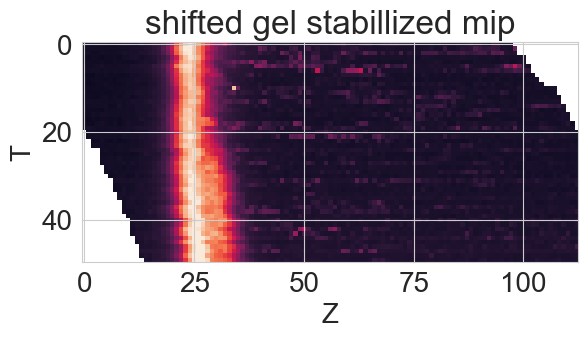

In [20]:
mip = np.nanmax(gel_norm_b, axis=(2,3))
plt.imshow(mip, vmin =0 ,vmax =3)
plt.title('shifted gel stabillized mip')
plt.xlabel('Z')
plt.ylabel('T')
plt.show()

In [21]:
np.save(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy', gel_norm_b)


In [22]:
del gel_minus_monomer, gel_norm_b

## <span color=red > Load Channel 2 images

In [85]:
file_list = pp.get_file_list(MOVIE_PATH + 'tiff/C2/')
#load images
c2_list = []
for i in range(len(file_list)):
    c2_list.append(tifffile.imread(MOVIE_PATH + 'tiff/C2/' + file_list[i]))
    
    print(i, end=',')
# get the max z since images where taken with different
max_z = pp.get_max_z(c2_list)

#set blank areas to nan

c2 = pp.make_numpy_from_list(c2_list, max_z)

1 Capture 7_T1_C2.tif
2 Capture 7_T2_C2.tif
3 Capture 7_T3_C2.tif
4 Capture 7_T4_C2.tif
5 Capture 7_T5_C2.tif
6 Capture 7_T6_C2.tif
7 Capture 7_T7_C2.tif
8 Capture 7_T8_C2.tif
9 Capture 7_T9_C2.tif
10 Capture 7_T10_C2.tif
11 Capture 7_T11_C2.tif
12 Capture 7_T12_C2.tif
13 Capture 7_T13_C2.tif
14 Capture 7_T14_C2.tif
15 Capture 7_T15_C2.tif
16 Capture 7_T16_C2.tif
17 Capture 7_T17_C2.tif
18 Capture 7_T18_C2.tif
19 Capture 7_T19_C2.tif
20 Capture 7_T20_C2.tif
21 Capture 7_T21_C2.tif
22 Capture 7_T22_C2.tif
23 Capture 7_T23_C2.tif
24 Capture 7_T24_C2.tif
25 Capture 7_T25_C2.tif
26 Capture 7_T26_C2.tif
27 Capture 7_T27_C2.tif
28 Capture 7_T28_C2.tif
29 Capture 7_T29_C2.tif
30 Capture 7_T30_C2.tif
31 Capture 7_T31_C2.tif
32 Capture 7_T32_C2.tif
33 Capture 7_T33_C2.tif
34 Capture 7_T34_C2.tif
35 Capture 7_T35_C2.tif
36 Capture 7_T36_C2.tif
37 Capture 7_T37_C2.tif
38 Capture 7_T38_C2.tif
39 Capture 7_T39_C2.tif
40 Capture 7_T40_C2.tif
41 Capture 7_T41_C2.tif
42 Capture 7_T42_C2.tif
43 Capture

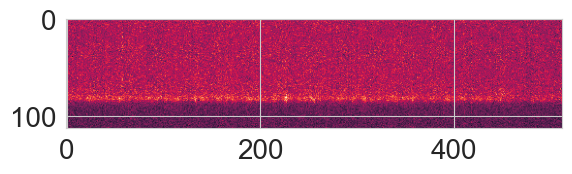

In [86]:
plt.imshow(c2[10,:,:,256])
plt.show()

In [87]:
first = True
if first:
    c2 = np.flip(c2,axis=1)

In [88]:
img_c2 = np.nanmean(c2, axis = (2,3))


C:\Users\amityu\AppData\Local\Temp\ipykernel_15272\2743648177.py:1: RuntimeWarning:

Mean of empty slice



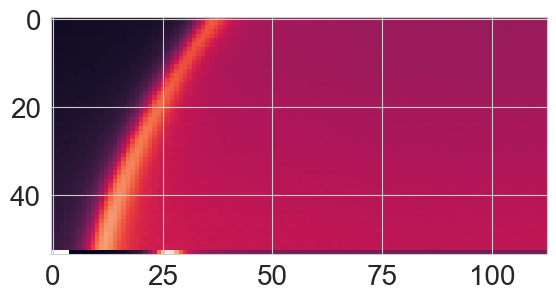

In [89]:
plt.imshow(img_c2)
plt.show()

In [91]:
c2 = c2[mask]

In [92]:
np.save(MOVIE_PATH + 'tmp/motors.npy',c2)

In [59]:
c2 = np.load(MOVIE_PATH + 'tmp/motors.npy')

In [93]:
raw_data = c2[~np.isnan(c2)]  #

In [94]:
hist, bin_edges = au.histogram_cupy(raw_data, bins=np.linspace(80, 150, 50))

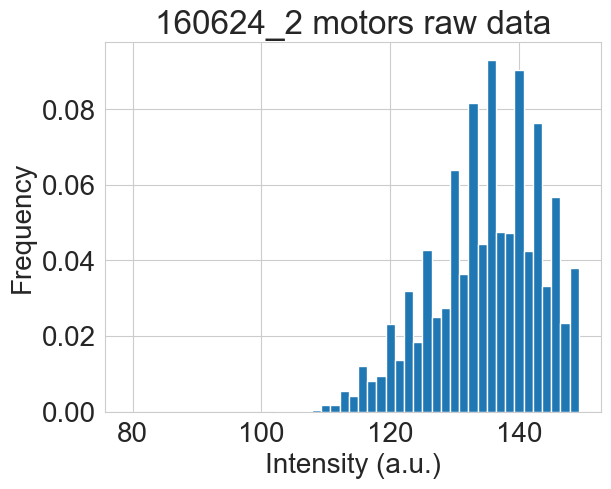

In [95]:

plt.bar(bin_edges[:-1], hist, width=bin_edges[1] - bin_edges[0])
plt.title(f'{movie} motors raw data')
image_name = 'Motors_data'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')
plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie, image_name))
plt.show()

In [96]:
del raw_data

In [97]:
illumination_sigma = 25

In [58]:
importlib.reload(pp)

<module 'preprocessing.preprocessing_v2' from 'C:\\Users\\amityu\\DataspellProjects\\gel_sheets\\preprocessing\\preprocessing_v2.py'>

In [98]:
filters = []

time_points = range(0,len(c2),1)
for i,t in tqdm(enumerate(time_points)):
    print(t)
    filters.append(pp.get_illumination_filter(c2[t],min_z_filter,max_z_filter,illumination_sigma))

0it [00:00, ?it/s]

0
some nans error
1
some nans error
2
some nans error
3
some nans error
4
some nans error
5
some nans error
6
some nans error
7
some nans error
8
some nans error
9
some nans error
10
some nans error
11
some nans error
12
some nans error
13
some nans error
14
some nans error
15
some nans error
16
some nans error
17
some nans error
18
some nans error
19
some nans error
20
some nans error
21
some nans error
22
some nans error
23
some nans error
24
some nans error
25
some nans error
26
some nans error
27
some nans error
28
some nans error
29
some nans error
30
some nans error
31
some nans error
32
some nans error
33
some nans error
34
some nans error
35
some nans error
36
some nans error
37
some nans error
38
some nans error
39
some nans error
40
some nans error
41
some nans error
42
some nans error
43
some nans error
44
some nans error
45
some nans error
46
some nans error
47
some nans error
48
some nans error
49
some nans error


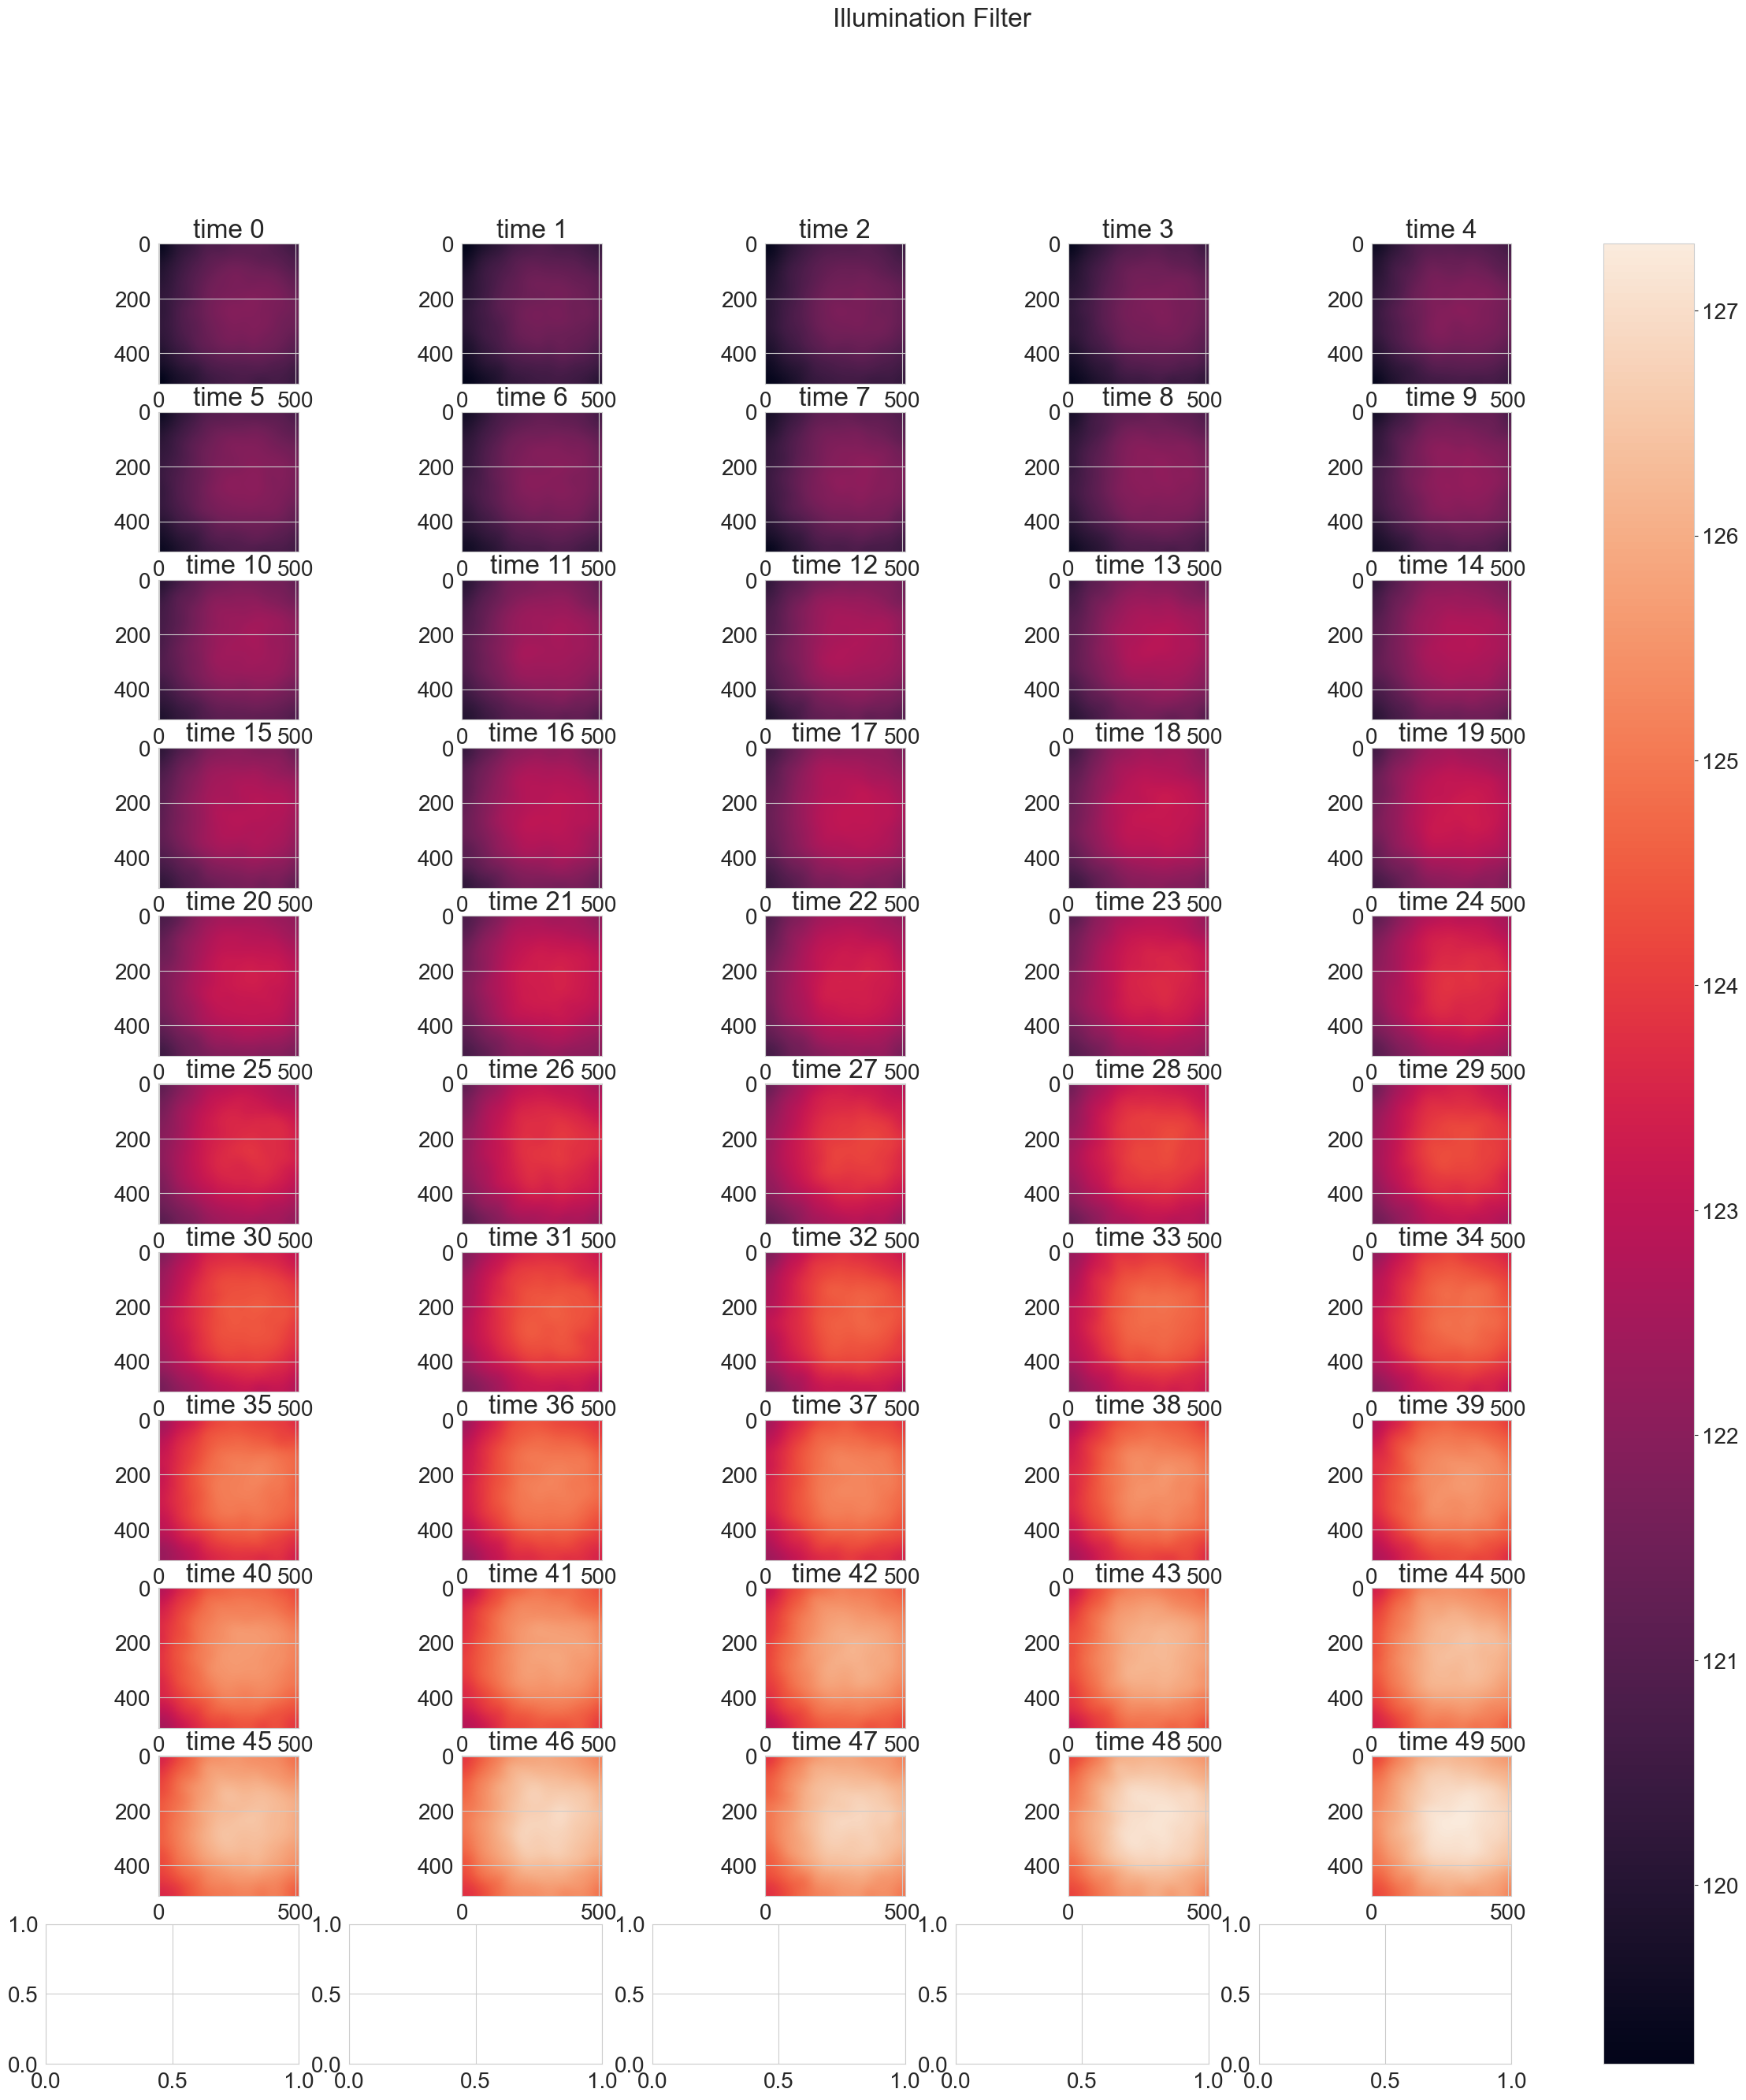

In [99]:
gu.show_imshow_sequence_with_colorbar(filters,time_points, 'Illumination Filter')



In [100]:
np.sum(np.isnan(filters[2]))

0

In [101]:
c2_corrected = pp.apply_one_illumination_filter(c2, filters[2])

  0%|          | 0/50 [00:00<?, ?it/s]

<function matplotlib.pyplot.show(close=None, block=None)>

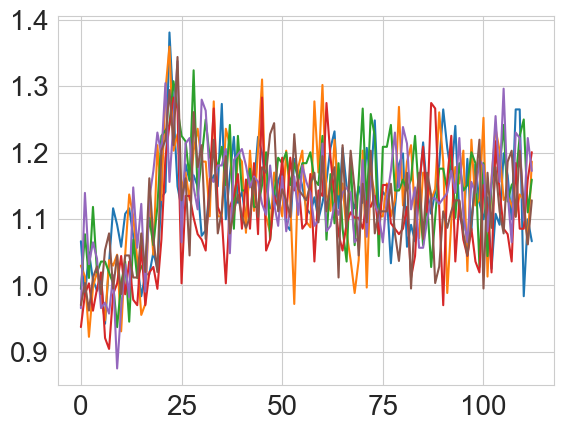

In [102]:
t = 20
x = 256
for y in range(0,512,100):
    plt.plot(c2_corrected[t,:,y,x])
plt.show

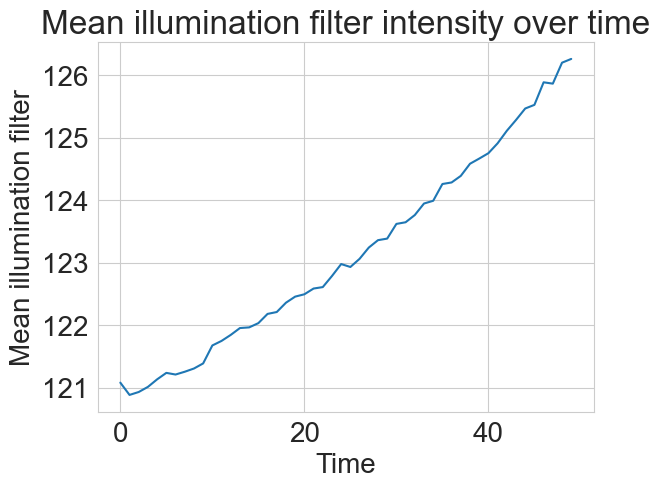

In [103]:
mean_illumination = np.mean(filters, axis = (1,2))
plt.plot(mean_illumination)
plt.title('Mean illumination filter intensity over time')
plt.xlabel('Time')

plt.ylabel('Mean illumination filter')
plt.show()


In [104]:
np.save(MOVIE_PATH +'tmp/motors_corrected.npy', c2_corrected)

In [69]:
c2_corrected = np.load(MOVIE_PATH +'tmp/motors_corrected.npy')

In [105]:
del c2_list, c2

In [106]:
data_after_illumination = c2_corrected[~np.isnan(c2_corrected)] 

In [107]:

hist, bins_edges = au.histogram_cupy(data_after_illumination, bins = np.linspace(0.5, 1, 100) )

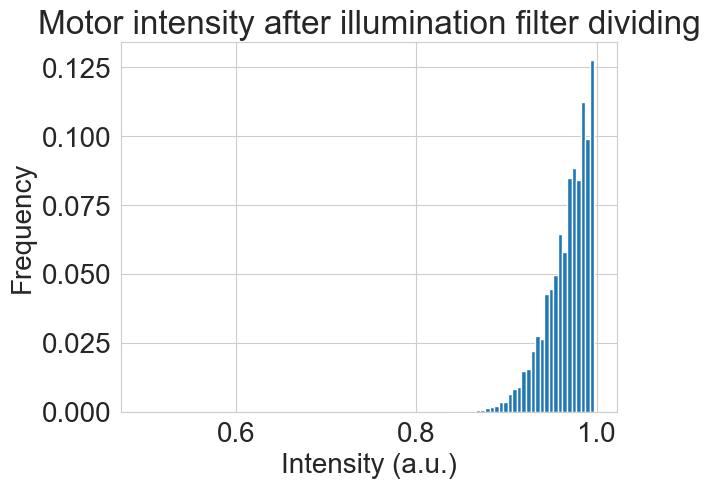

In [108]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1]- bins_edges[0])
plt.title('Motor intensity after illumination filter dividing')
image_name = 'Motor after_illumination_filter'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie,image_name))
plt.show()

In [109]:
#shifting the values to zeros manually, if I took minimum function there will be noise that destrupt. I could also take from promil value
c2_corrected -= 0.85

In [110]:
data_after_illumination = c2_corrected[~np.isnan(c2_corrected)]

In [111]:

hist, bins_edges = au.histogram_cupy(data_after_illumination, bins=np.linspace(0, 0.5, 51))

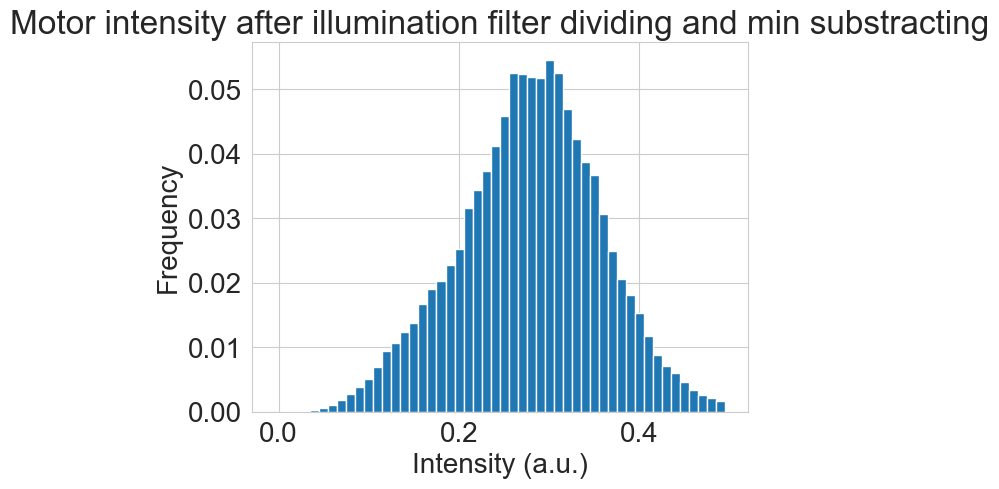

In [112]:
plt.bar(bins_edges[:-1], hist, width=bins_edges[1] - bins_edges[0])
plt.title('Motor intensity after illumination filter dividing and min substracting')
image_name = 'Motor after_illumination_filter'
plt.xlabel('Intensity (a.u.)')
plt.ylabel('Frequency')

plt.savefig(DATA_PATH + '{}/tmp/{}.png'.format(movie, image_name))
plt.show()

In [113]:
np.save(MOVIE_PATH + 'tmp/c2_corrected.npy', c2_corrected)

In [ ]:
c2_corrected = np.load(MOVIE_PATH + 'tmp/c2_corrected.npy')

In [114]:
z = pd.read_csv(MOVIE_PATH + 'np/membrane_fit.csv')['z'].to_numpy()

In [115]:

c2_norm_b = np.zeros(c2_corrected.shape, dtype=np.float32)
#z = pd.read_csv(MOVIE_PATH + 'np/membrane_fit.csv')['z'].to_numpy()
for t in trange(len(c2_corrected)):
    shift_val = [(z0 - z[t]), 0, 0]

    # shift your array
    c2_norm_b[t] = scipy.ndimage.shift(c2_corrected[t], shift_val, mode='constant', cval=np.nan, order=1)

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\amityu\AppData\Local\Temp\ipykernel_15272\2557250571.py:1: RuntimeWarning:

All-NaN slice encountered



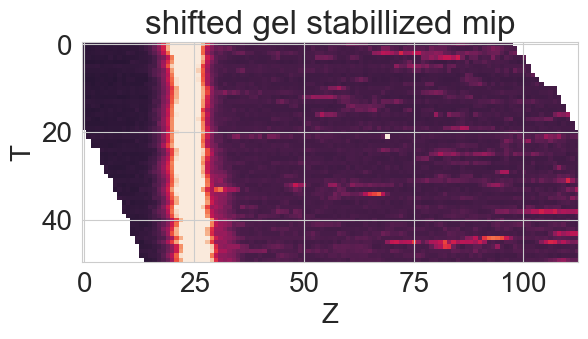

In [116]:

mip = np.nanmax(c2_norm_b, axis=(2, 3))
plt.imshow(mip, vmin=0, vmax=3)
plt.title('shifted gel stabillized mip')
plt.xlabel('Z')
plt.ylabel('T')
plt.show()

In [117]:
np.save(MOVIE_PATH + 'tmp/c2_norm_before_trim.npy', c2_norm_b)


In [118]:
gel_norm_b = np.load(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy')
c2_norm_b = np.load(MOVIE_PATH + 'tmp/c2_norm_before_trim.npy')


C:\Users\amityu\AppData\Local\Temp\ipykernel_15272\806331334.py:1: RuntimeWarning:

Mean of empty slice

C:\Users\amityu\AppData\Local\Temp\ipykernel_15272\806331334.py:2: RuntimeWarning:

Mean of empty slice



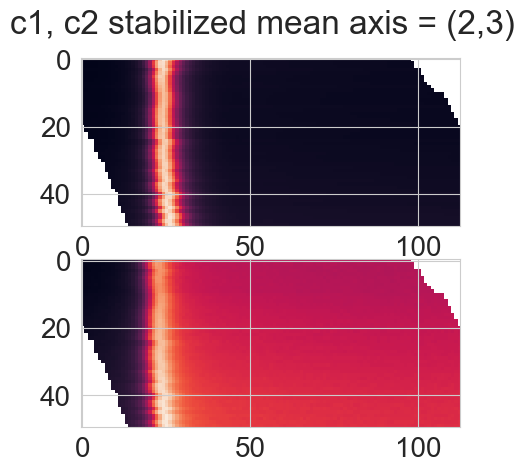

In [119]:
mip_c1 = np.nanmean(gel_norm_b, axis=(2, 3))
mip_c2 = np.nanmean(c2_norm_b, axis=(2, 3))
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.imshow(mip_c1)
ax2.imshow(mip_c2)
fig.suptitle('c1, c2 stabilized mean axis = (2,3)')
plt.show()


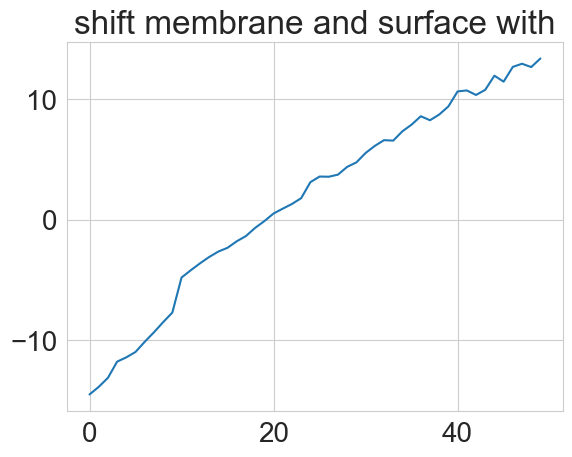

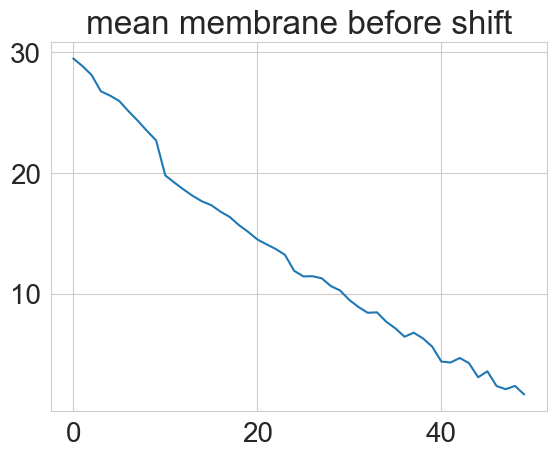

membrane mean should be 15


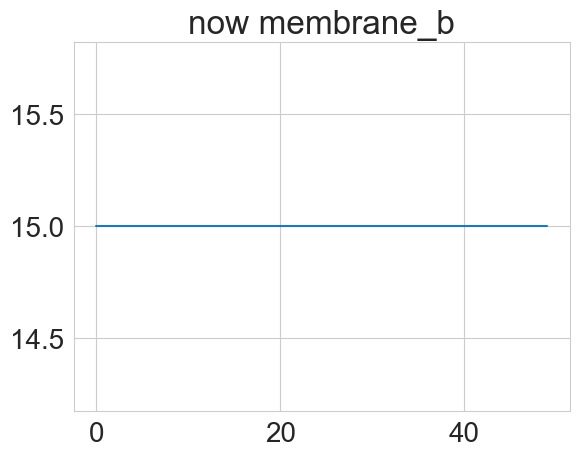

In [120]:
gel_norm_b = np.load(MOVIE_PATH + 'tmp/gel_norm_before_trim.npy')
c2_norm_b = np.load(MOVIE_PATH + 'tmp/c2_norm_before_trim.npy')

surface_b = np.load(MOVIE_PATH + 'tmp/height45_s3.npy')
membrane_b = np.load(MOVIE_PATH + 'tmp/membrane45_s3.npy')
### <span color = 'red'> check spike in seg_gui and update in ex_data spike_in and spike_out
# calculating holes in breakage
spike_b = pp.spike(surface_b)

plt.plot(z0 - z)
plt.title('shift membrane and surface with')
plt.show()

plt.plot(np.nanmean(membrane_b, axis=(1, 2)))
plt.title('mean membrane before shift')
plt.show()
print('membrane mean should be {}'.format(z0))
membrane_b += z0
z = z.reshape(-1, 1, 1)
z = np.tile(z, (1, membrane_b.shape[1], membrane_b.shape[2]))
membrane_b -= z
surface_b += z0
surface_b -= z
spike_b += z0
spike_b -= z
plt.plot(np.nanmean(membrane_b, axis=(1, 2)))  #.astype(int))
plt.title('now membrane_b')
plt.show()
np.save(MOVIE_PATH + 'np/spike.npy', spike_b)
np.save(MOVIE_PATH + 'np/height.npy', surface_b)
np.save(MOVIE_PATH + 'np/membrane.npy', membrane_b)
np.save(MOVIE_PATH + 'np/gel_norm.npy', gel_norm_b)
np.save(MOVIE_PATH + 'np/motors_norm.npy', c2_norm_b)


In [121]:
del gel_norm_b, c2_norm_b,spike_b,surface_b,membrane_b